In [2]:
import solution_crosser
import solution_generator
import table_placer
import CONST
from graph import RoomGraph
import loader
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def graph_to_heatmap(graph:RoomGraph):
    shape = (max(graph.walls, key=lambda x: x[0])[0] + 1, max(graph.walls, key=lambda x: x[1])[1] + 1)
    heatmap = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
    for wall in graph.walls:
        heatmap[wall[0]][wall[1]] = 1
    for door in graph.doors:
        heatmap[door[0]][door[1]] = 2
    for table in graph.tables:
        heatmap[table[0]][table[1]] = 3
    for chair in graph.chairs:
        heatmap[chair[0]][chair[1]] = 4
    
    return heatmap

graph = loader.load_grid("grids_solutions/grid_test")
print(graph.tables)
heatmap = graph_to_heatmap(graph)


    

{(7, 17), (10, 43), (2, 39), (16, 38), (7, 35), (5, 10), (5, 28), (3, 49), (13, 17), (16, 13), (7, 10), (17, 51), (11, 44), (5, 3), (10, 54), (2, 50), (12, 18), (5, 21), (4, 23), (3, 33), (4, 32), (6, 4), (10, 29), (9, 3), (14, 17), (11, 9), (5, 23), (8, 25), (17, 46), (9, 42), (11, 2), (3, 28), (4, 27), (14, 37), (12, 49), (8, 36), (7, 16), (10, 42), (9, 44), (5, 9), (11, 4), (4, 29), (10, 8), (13, 16), (15, 13), (16, 12), (7, 9), (17, 50), (10, 44), (11, 43), (2, 40), (6, 22), (2, 49), (12, 17), (4, 22), (16, 51), (16, 5), (13, 18), (9, 30), (11, 36), (5, 4), (9, 2), (14, 16), (15, 36), (10, 3), (15, 54), (4, 33), (11, 11), (10, 21), (10, 30), (17, 45), (6, 8), (15, 38), (3, 18), (14, 18), (16, 37), (16, 46), (8, 17), (5, 27), (8, 26), (8, 35), (6, 10), (9, 43), (7, 36), (10, 53), (4, 28), (3, 32), (5, 29), (6, 3), (3, 50), (11, 42), (6, 21), (12, 16), (4, 21), (16, 50), (10, 9), (11, 8), (5, 22), (16, 4), (9, 29), (11, 35), (6, 23), (10, 2), (9, 4), (10, 11), (3, 27), (14, 36), (15,

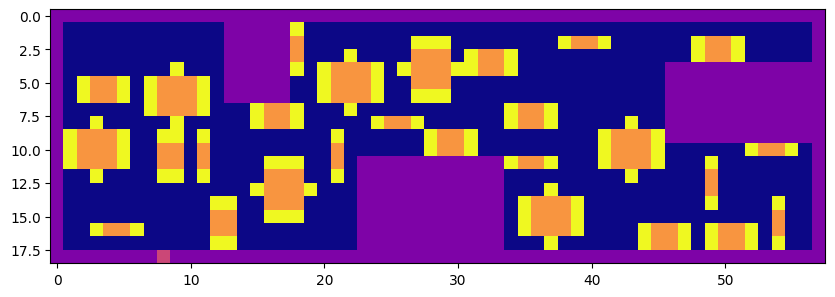

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(heatmap, cmap="plasma", interpolation='nearest')

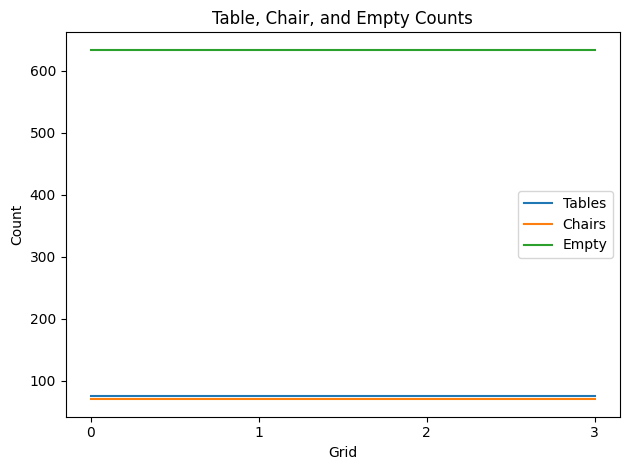

In [49]:
#file_list: list of file names
def graph_stats(file_list):
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    table_count = []
    chair_count = []
    empty_count = []
    for graph in graph_list:
        area = (max(graph.walls, key=lambda x: x[0])[0] + 1)*(max(graph.walls, key=lambda x: x[1])[1] + 1)
        table_count.append(len(graph.tables))
        chair_count.append(len(graph.chairs))
        empty_count.append(area - len(graph.tables) - len(graph.chairs) - len(graph.walls) - len(graph.doors))
    fig, ax = plt.subplots()
    index = np.arange(len(file_list))
    ax.plot(index, table_count, label='Tables')
    ax.plot(index, chair_count, label='Chairs')
    ax.plot(index, empty_count, label='Empty')
    plt.xlabel('Grid')
    plt.ylabel('Count')
    plt.title('Table, Chair, and Empty Counts')
    plt.xticks(index)
    plt.legend()
    plt.tight_layout()
    plt.show()

#example usage
f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
graph_stats(f_list)



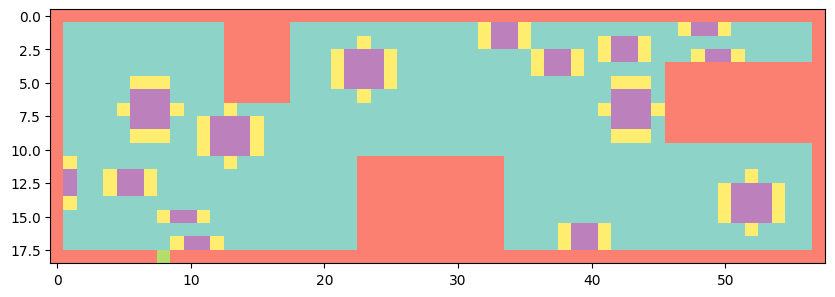

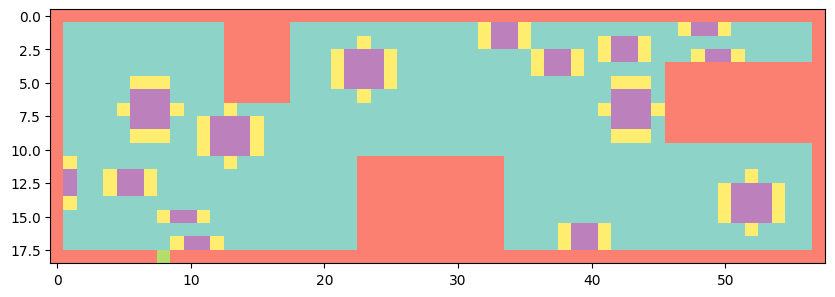

In [50]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
def animate_evolution(file_list):
    plt.ion()
    graph_list = []
    for file in file_list:
        graph_list.append(loader.load_grid(file))
    heatmap_list = []
    for graph in graph_list:
        heatmap_list.append(graph_to_heatmap(graph))
    fig, ax = plt.subplots(figsize=(10, 10))
    for heatmap in heatmap_list:
        ax.imshow(heatmap, cmap="Set3", interpolation='nearest')
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)



f_list = ["grids_solutions/sol_grid0", "grids_solutions/sol_grid1", "grids_solutions/sol_grid2", "grids_solutions/sol_grid3"]
animate_evolution(f_list)

### Finding best solutions

In [5]:
def graph_process(stats):
    chair_count = []
    times = []
    for i in range(len(stats)):
        chair_count.append(len(stats[i]['best'].chairs))
        times.append(stats[i]['time'])

    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    steps = np.arange(len(stats))

    ax[0].plot(steps, chair_count)
    ax[0].set_xlabel('step')
    ax[0].set_ylabel('chairs')
    ax[0].set_title('Best subject chairs count in each step')
    ax[0].set_xticks(steps)

    ax[1].plot(steps, times, color='red')
    ax[1].set_xlabel('step')
    ax[1].set_ylabel('duration (s)')
    ax[1].set_title('Duration of each step')
    ax[1].set_xticks(steps)

    plt.tight_layout()
    plt.show()

def show_grid(grid, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = graph_to_heatmap(grid)
    ax.imshow(heatmap, cmap="plasma", interpolation='nearest')
    plt.title(title)
    plt.show()

In [6]:
from solution_finder import find_solutions
from loader import load_grid


def show_process(initial_grid, stats):
    show_grid(graph, 'initial grid')
    graph_process(stats)
    show_grid(stats[-1]['best'], 'best solution')

### grids_empty/grid1

In [7]:
PATH = 'grids_empty/grid1'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph = load_grid(PATH)
stats = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

-------------------------------------------------------------------
step 0 took 1.23s
best solution: 88
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 1.72s
best solution: 116
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 1.60s
best solution: 124
-------------------------------------------------------------------
-------------------------------------------------------------------
step 3 took 1.81s
best solution: 126
-------------------------------------------------------------------
-------------------------------------------------------------------
step 4 took 1.82s
best solution: 132
-------------------------------------------------------------------
-------------------------------------------------------------------
step 5 took 1.80s
best solution: 138
-------------------------------

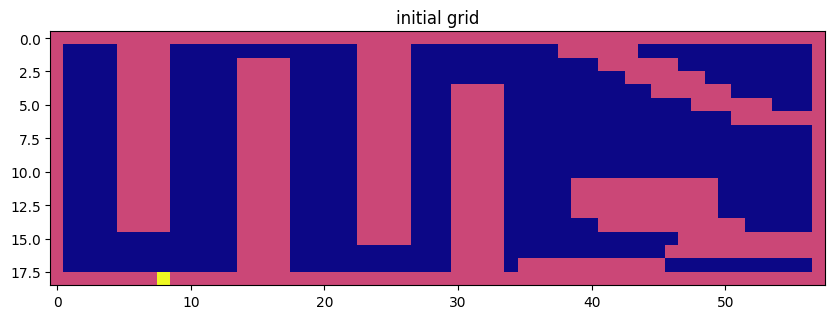

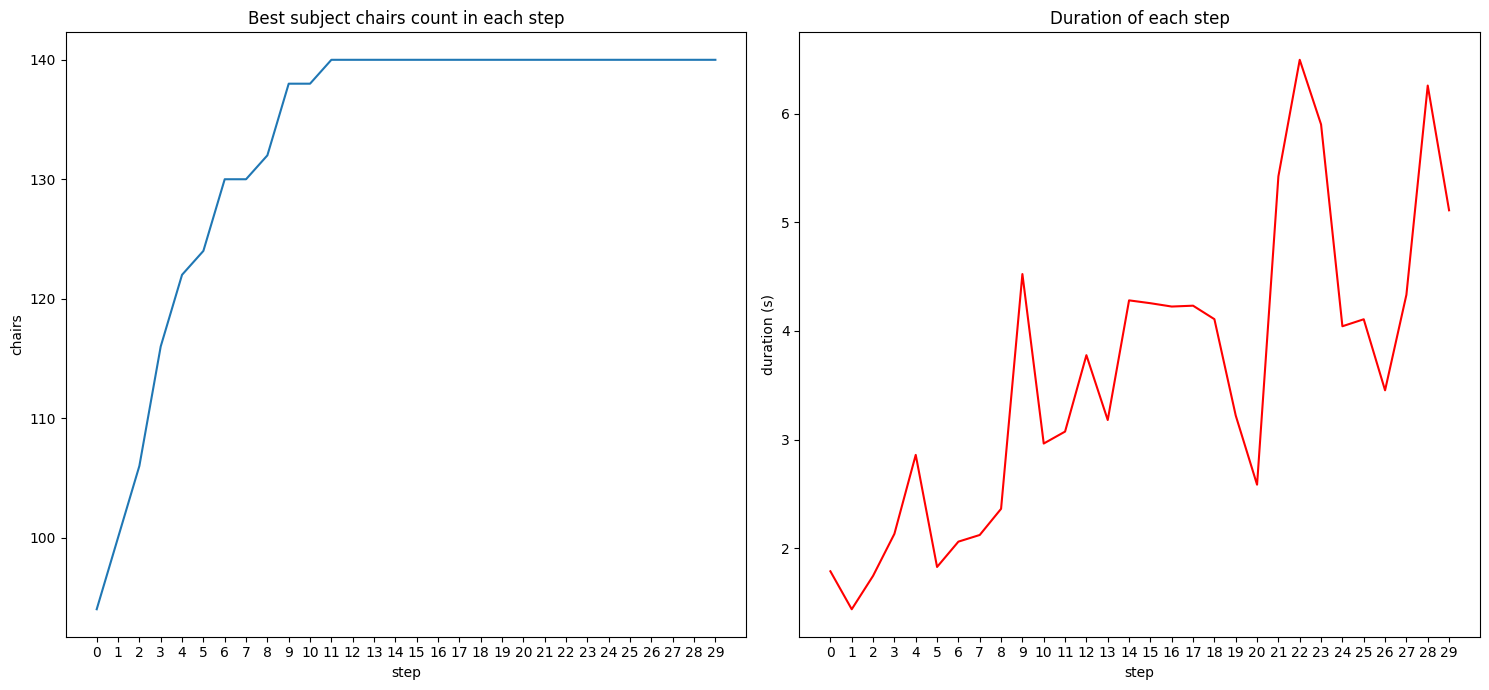

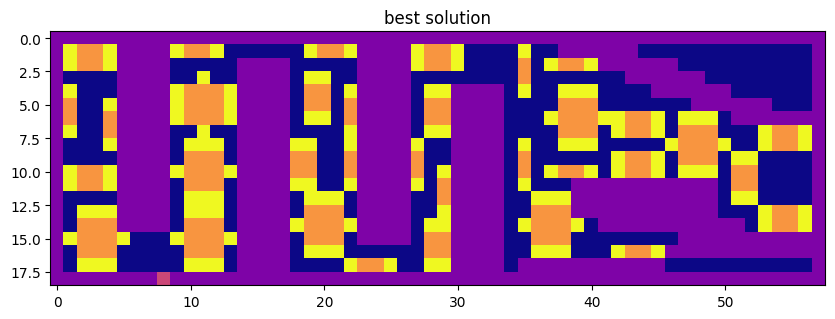

In [23]:
show_process(graph, stats)

### grids_empty/grid2

In [22]:
PATH = 'grids_empty/grid2'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph = load_grid(PATH)
stats = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

for placment:  [17 51] no path to:  (17, 50)
for placment:  [ 1 52] no path to:  (2, 54)
for placment:  [ 1 50] no path to:  (2, 49)
for placment:  [ 3 54] no path to:  (2, 55)
for placment:  [ 2 53] no path to:  (3, 52)
for placment:  [ 3 56] no path to:  (2, 56)
for placment:  [ 2 55] no path to:  (4, 55)
for placment:  [ 2 53] no path to:  (4, 54)
for placment:  [ 2 53] no path to:  (3, 52)
for placment:  [ 2 52] no path to:  (2, 54)
for placment:  [ 1 53] no path to:  (1, 52)
for placment:  [ 2 53] no path to:  (3, 52)
for placment:  [ 3 52] no path to:  (4, 54)
for placment:  [ 2 53] no path to:  (3, 52)
for placment:  [ 2 53] no path to:  (3, 52)
for placment:  [15 43] no path to:  (15, 45)
for placment:  [ 1 51] no path to:  (2, 50)
for placment:  [ 2 52] no path to:  (2, 54)
for placment:  [16 25] no path to:  (8, 46)
for placment:  [ 2 53] no path to:  (2, 52)
for placment:  [ 2 54] no path to:  (2, 56)
for placment:  [16 26] no path to:  (1, 31)
for placment:  [16 24] no path

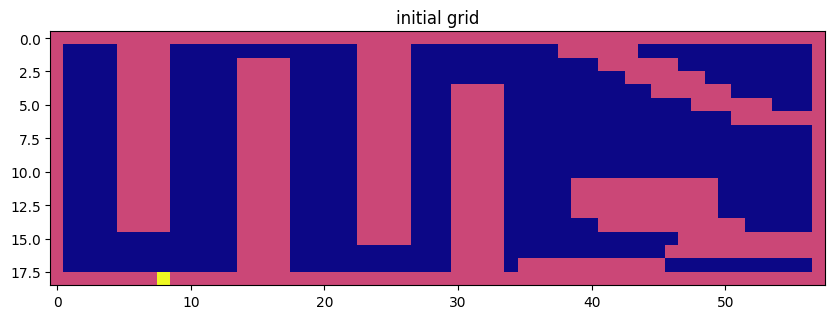

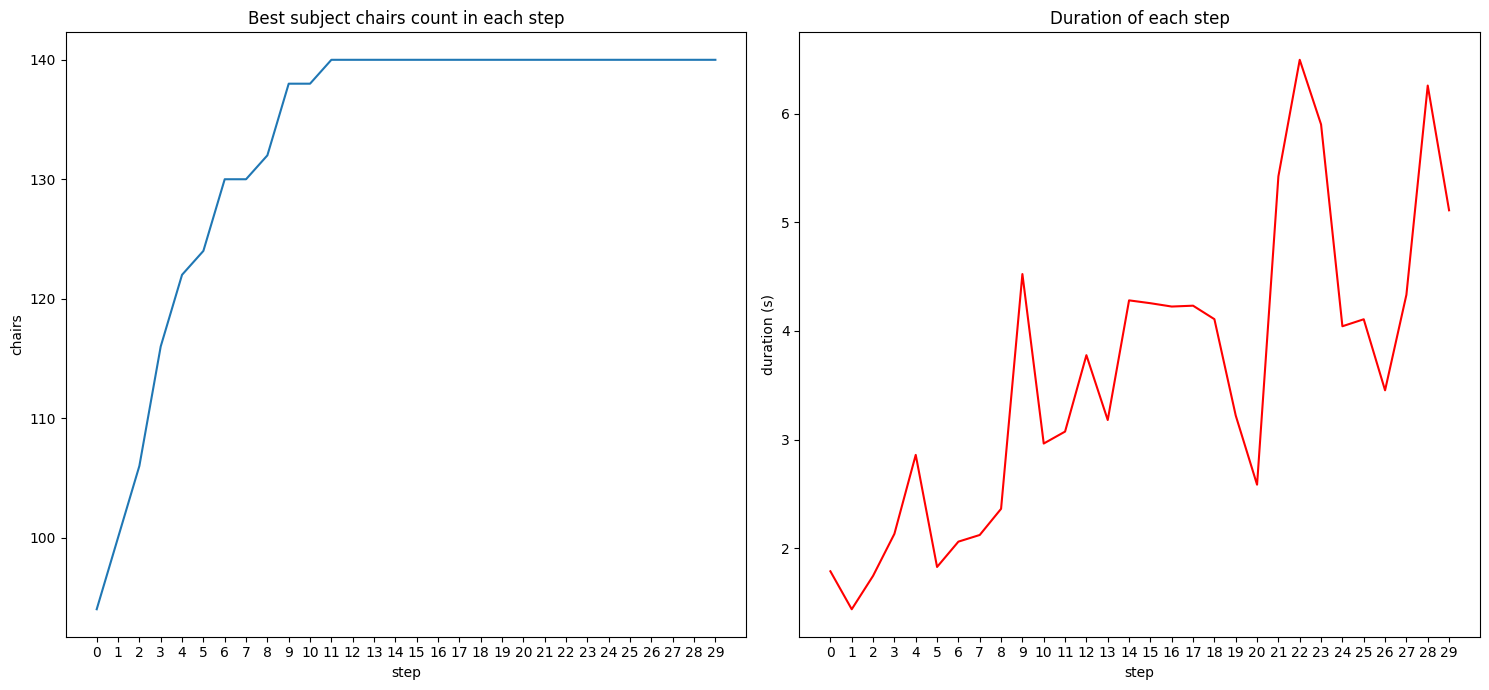

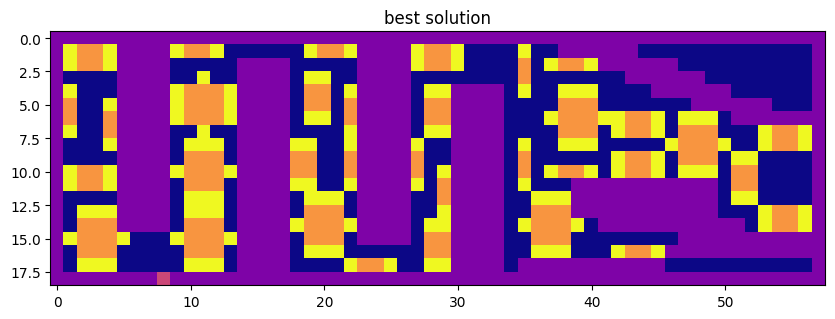

In [24]:
show_process(graph, stats)

### grids_empty/random_grid

In [25]:
PATH = 'grids_empty/random_grid'
POPULATION_SIZE = 10
STEPS = 30
TABLE_SPECS = [(1, 5), (2, 5), (3, 5)]

graph = load_grid(PATH)
stats = find_solutions(graph, POPULATION_SIZE, STEPS, TABLE_SPECS)

-------------------------------------------------------------------
step 0 took 14.63s
best solution: 130
-------------------------------------------------------------------
-------------------------------------------------------------------
step 1 took 20.97s
best solution: 184
-------------------------------------------------------------------
-------------------------------------------------------------------
step 2 took 21.02s
best solution: 216
-------------------------------------------------------------------


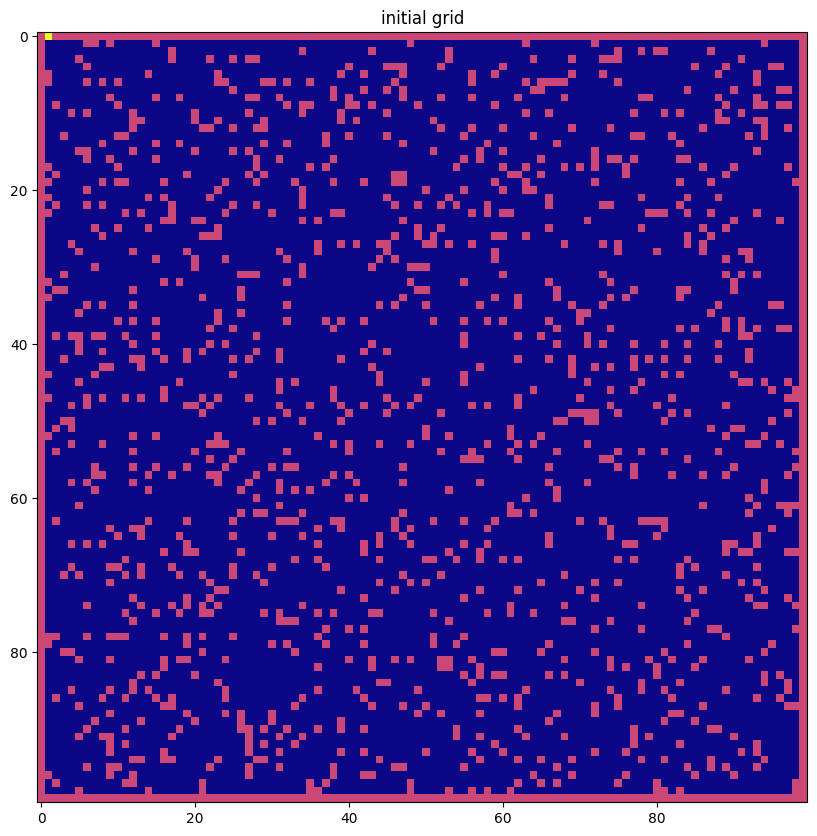

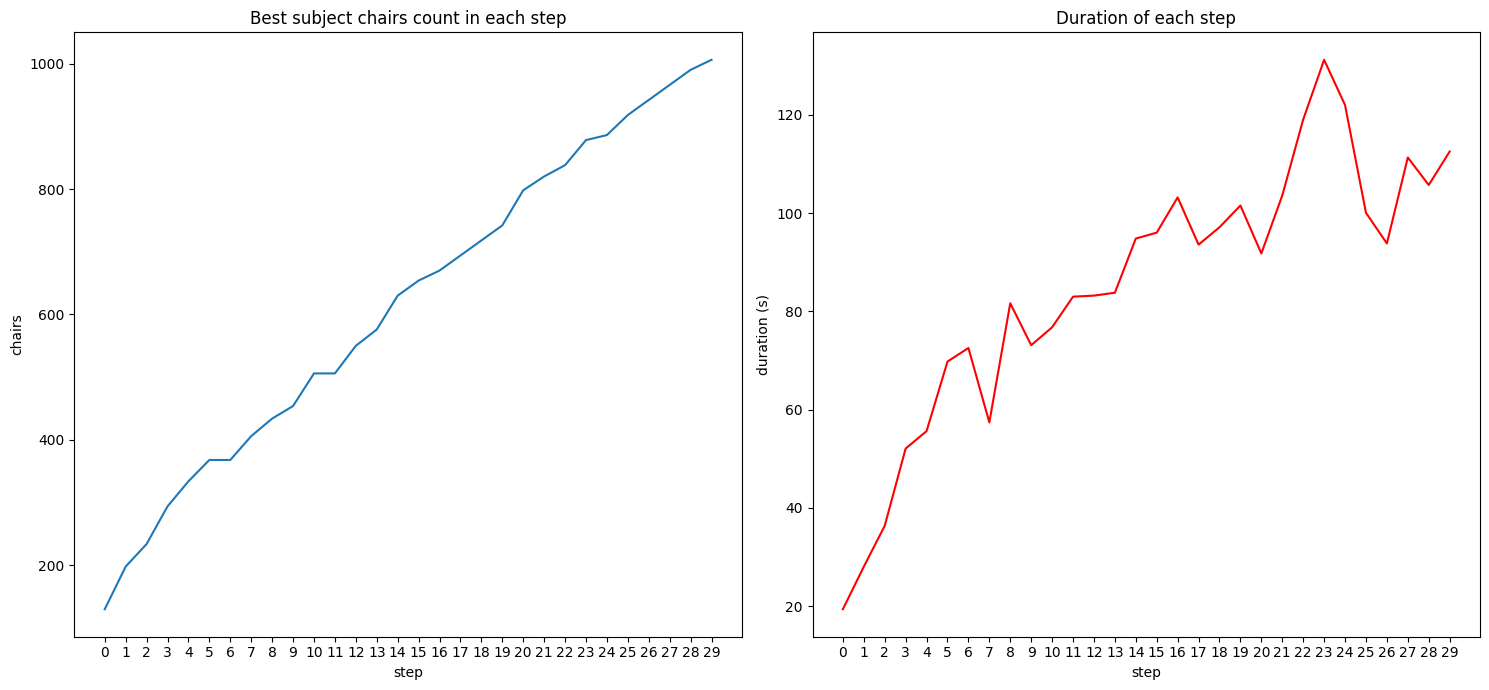

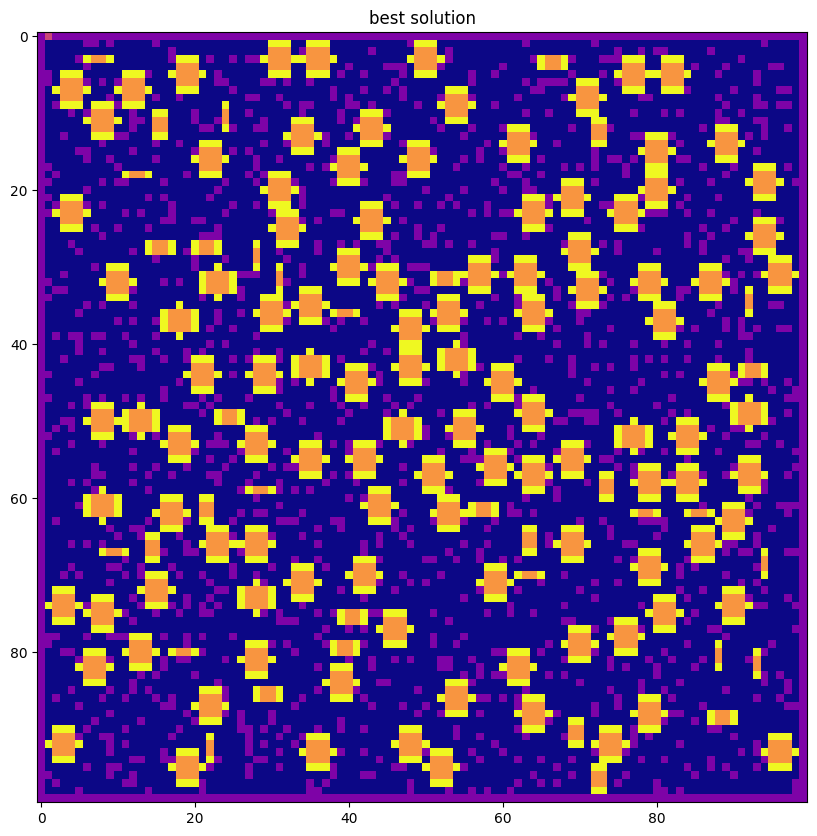

In [14]:
show_process(graph, stats)

YOO
YOO
YOO
YOO
YOO
BYYY
BYYY
BYYY
BYYY
BYYY


[None, None, None, None, None]